# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее введение в проект - пригодится в будущем, когда соберешь большое портфолио и откроешь проект вновь👍

</div>


### Откройте файл с данными и изучите общую информацию. 

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

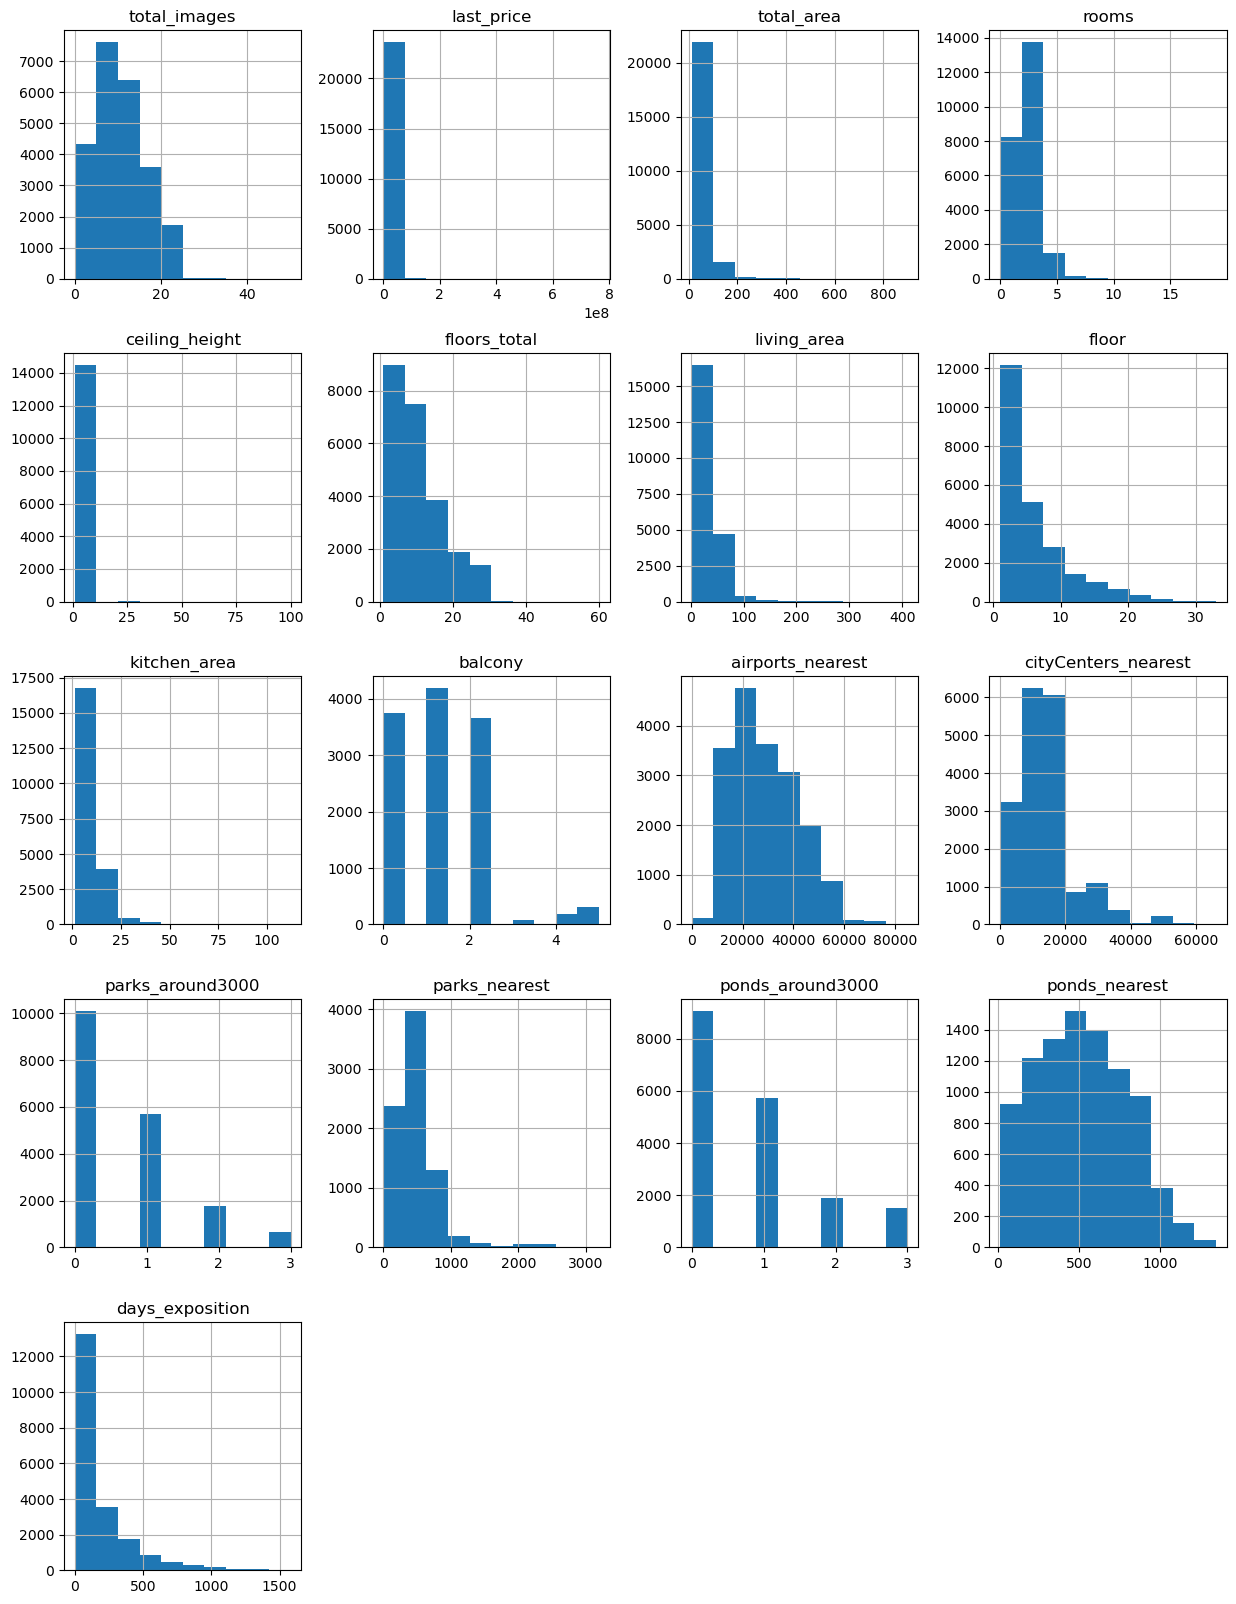

In [1]:
import pandas as pd
data = pd.read_csv('real_estate_data.csv', sep = '\t')
print(data.head(5))
data.info()
data.hist(figsize=(15, 20))

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Гистограммы построены👍 Приступаем к предобработке

</div>


### Предобработка данных

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
   
   Посмотрим на все возможные значения в столбце ceiling_height, до обработки

</div>

In [2]:
# Код ревьюера
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Видим, что есть значения  24. 26. 27. Вероятнее всего, продавец имел ввиду 2.4 2.6 2.7 Исправим это, воспользовавшись методом update

</div>




In [3]:
# Код ревьюера
data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,
      

In [4]:
#print(data.isna().sum())
values = {'is_apartment': 0, 'balcony': 0}

data = data.fillna(value=values)
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
#print(data.isna().sum())
#print()
#print(data.duplicated().sum())
#print(data.locality_name.unique()) # смотрим уникальные названия населённых пунктов

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data.locality_name.unique()

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#data.info()


#print(data.query('last_price < 100000')['last_price'].count())
#print(data.query('last_price > 100000000')['last_price'].count()) # считаем квартиры больше 100 млн.
#print(data.query('ceiling_height > 6.0')['ceiling_height'].count()) # сморим потолки больше 6м.

#print(data.query('ceiling_height > 10.0')['ceiling_height'].count()) # сморим потолки больше 10м.)

data.drop(data[data.ceiling_height > 6.0].index, inplace=True) # удаляем потолки больше 6м.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean()) # Средняя высота потолка 2.72 (заменяем)
relationship_liv = data['total_area'].median()/data['living_area'].median() # Создаем переменную с коффициентом для подсчёта
print(relationship_liv) # коффициент как мне кажетсяся великоват 1.74
data['living_area'] = data['living_area'].fillna(data['total_area'] / relationship_liv)

relationship_kit = data['total_area'].median()/data['kitchen_area'].median() # Создаем переменную с коффициентом для подсчёта
print(relationship_kit) # коффициент как мне кажетсяся великоват 1.74
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / relationship_kit)


data.query('floors_total <= 0')['floors_total'].count()
data.drop(data[data.floors_total <= 0].index, inplace=True)
data.drop(data[data.floors_total >= 25].index, inplace=True)


print(data.isna().sum())


#print(data.query('living_area <= 10')['living_area'].count()) #  считаем квартиры меньше 10м2 (их 54).
data.drop(data[data.living_area <= 10].index, inplace=True)

#print(data.query('airports_nearest <= 1000')['airports_nearest'].count()) #  считаем квартиры ближе 1000м от аэродрома (их 1).
data.drop(data[data.airports_nearest <= 1000].index, inplace=True)

#print(data.query('parks_nearest <= 20')['parks_nearest'].count()) #считаем квартиры ближе 20м (ширина дороги) от парка (их 7740)
data.drop(data[data.parks_nearest <= 20].index, inplace=True)

#print(data.query('ponds_nearest	 <= 30')['ponds_nearest'].count()) #считаем квартиры ближе 30м (ширина дороги) от водоема
data.drop(data[data.ponds_nearest <= 30].index, inplace=True)

print(data.query('days_exposition >= 600')['days_exposition'].count())


data.describe()

1.7333333333333334
5.714285714285714
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5301
city_centers_nearest     5280
parks_around3000         5279
parks_nearest           14442
ponds_around3000         5279
ponds_nearest           13610
days_exposition          3065
dtype: int64
1139


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22098.000000,2.209800e+04,22098.000000,22098,22098.000000,22098.000000,22014.000000,22098.000000,22098.000000,22098.000000,22098.000000,16808.000000,16829.000000,16830.000000,7686.000000,16830.000000,8546.000000,19058.000000
mean,9.878405,6.548490e+06,60.674149,2017-11-08 07:55:38.039641344,2.099149,2.726192,9.723767,35.055680,5.425287,10.422994,0.577337,28453.250238,14106.562957,0.629947,488.685922,0.784551,518.996256,182.050320
min,0.000000,4.300000e+05,14.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,10.080000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,21.000000,0.000000,31.000000,2.000000
25%,6.000000,3.400000e+06,40.400000,2017-05-11 00:00:00,1.000000,2.600000,5.000000,19.165385,2.000000,7.000000,0.000000,18590.000000,8801.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,52.000000,2017-12-11 00:00:00,2.000000,2.726332,9.000000,30.200000,4.000000,9.000000,0.000000,26319.000000,12915.000000,0.000000,451.000000,1.000000,502.000000,96.000000
75%,14.000000,6.750000e+06,70.000000,2018-08-28 00:00:00,3.000000,2.726332,13.000000,42.600000,7.000000,11.800000,1.000000,36756.250000,16156.000000,1.000000,608.000000,1.000000,728.000000,233.000000
max,50.000000,7.630000e+08,631.200000,2019-05-03 00:00:00,19.000000,6.000000,24.000000,409.000000,24.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.661525,1.084798e+07,35.701426,NaN,1.082675,0.223806,5.559249,22.489145,4.271795,6.077569,0.947801,12331.325870,8817.322484,0.808965,338.690829,0.944939,275.502703,221.341691


В нашем ДатаФрейме есть ряд пропусков данных:
1) ceiling_height, floors_total, living_area, is_apartment, kitchen_areа, balcony - данные пропуски как мне кажется допущенны людьми заполнявшими обьявления. Возможно какуюто информацию они сами не захотели заполнять а какуюто могли не знать о своей недвижимости.
2) airports_nearest - и все оставшиесе графы это картографические как я понимаю эти графы должны заполнятся автоматически, но по какойто причине не заполнились возможно в допустимой близости нет данных обьектов.
3) locality_name -пока не трогал но вопросики есть

Перевел столбец first_day_exposition из формата object в формат datetime, теперь если что мы сможем применять эти данные правельно.

Ищем выбросы и аномальные значеия:
1- last_price- имеем минимальцую цену в 12 тысяч максимальную 763 милиона (довольно дорого).(Так и у нас 37 квартир дороже 100 милионов что дорого но для спб норм.)
2- total_area- центр ломится от 12м2 квартир (расселёные коммуналки), 900м2 тоже может иметь место.
3- rooms - с количеством комнат тоже не вижу ничего странного 19 комнат для дома в 900м2 обычное дело, а квартиры с 0 комнатами видимо студии.

4- ceiling_height(я сначала заменил все NAN на 0 и средняя высота получилась 1.6) - тут максимум 100 м. почти Исаакиевский собор! удалим все строки выше 6 метров.
***4.1 - ceiling_height - так как пропусков в данных 8388 заполним отсутствующие данные средним.

5- floors_total -  думаю стоит посмотреть и удалить строки с значением этажей 0 и больше 25 этажей.

6- living_area - исходя из имеющихся данных (12м2 общая мин площадь квартиры) можно предположить что минимальная жилая площадь будет 10м2! Полагаю что стоит отказатся от данных меньше 10м2! 
***6.1 - Гениальный и простой выход из ситуации) Следуя комментарию ревьюэра выполняем математические операции.


7- floor - Данные по этажам считаю адекватными.
8- kitchen_area - значение мин 1.3 хотя насколько я понимаю в студиях кухни считаются желой зоной( 
***8.1 - Гениальный и простой выход из ситуации) Следуя комментарию ревьюэра выполняем математические операции.

9 - balcony - тут все норм) человек котырый может позволить кухню в 107 метровБ может и на 5 балконах тусоватся!
10 - city_centers_nearest - тут я тоже все пропуски в данных заменил на ноль( это искажает картину (люди не живут в аэропорту, парке и тд.) Допустим что есть стандарт который запрещает строить жилые дома вблизи аэродромов (1000 м2)!
11 - city_centers_nearest - тут сданными все норм оставляем как есть.
12 - parks_around3000 - вроде как все норм оставляем как есть!
13 - parks_nearest - в данных слишком много пропусков 14402, а если мы уберем значения меньше 20 то работать мы будем по 7731.
14 - ponds_around3000 - тут такаяже ситуация как и в parks_around3000.
15 - ponds_nearest - также как и в parks_nearest убираем данные меньше 30 м. 


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   
   По столбцу `ceiling_height` - рекомендую рассмотреть значения, большие, чем 10м - может быть, продавцы ошиблись на порядок, заполняя данные? Это можно исправить. После этого рекомендую заполнить пропуски в столбце медианным значением - оно будет уже не так сильно подвержено выбросам
</div> 





<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   
   По столбцу `living_area` - иногда продавцы могут не указывать данное значение, однако, мы можем попробовать его вычислить. Нужно найти **соотношение медианной общей площади к медианной жилой**. А затем, заполнить пропуски в столбце `living_area` **отношением общей площади к найденному соотношению**.  (ВАУ!)

  Со столбцом `kitchen_area` можно поступить так же, как со столбцом `living_area`.


</div>
<div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
   
   Посмотри внимательно, ты считаешь среднее - mean. А медианное - это median. В коде поправил

</div>




<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️ 
    
В целом, работа по предобработке проведена очень качественно. Можно еще сэкономить память, изменяя типы данных. Например, дополнительно изменить их у площадей квартир с float64 на float32.
Также рекомендую хорошую статью по предобработке, в ней есть интересные способы обработки неявных дубликатов: https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27 
    
</div>    

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   После проработки замечаний, рекомендую посмотреть, какая доля от начального датасета у нас осталась

</div>




3 Посчитайте и добавьте в таблицу новые столбцы

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23696            18   2500000.0       56.70           2018-02-11      2   
23697            13  11475000.0       76.75           2017-03-28      2   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.700000 

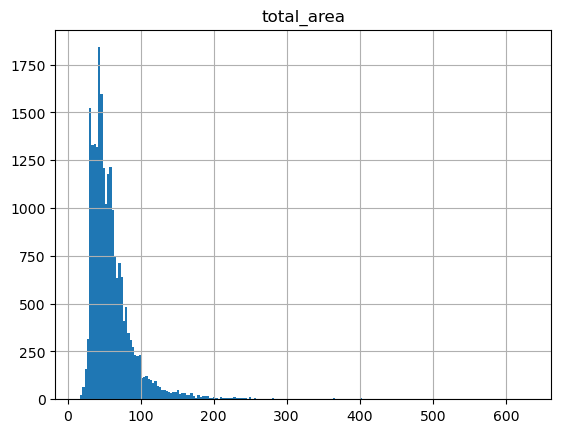

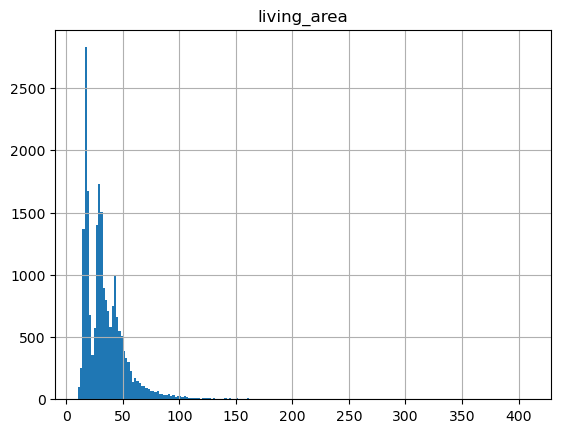

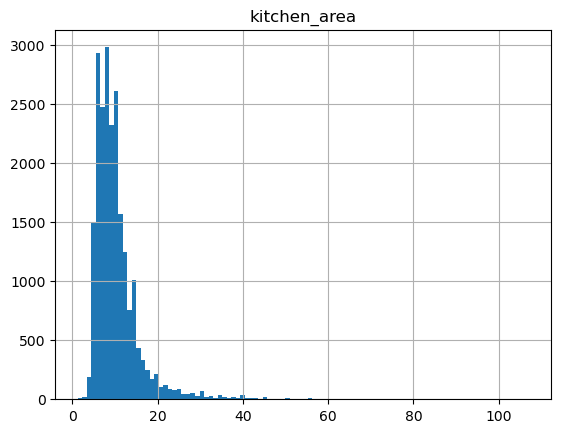

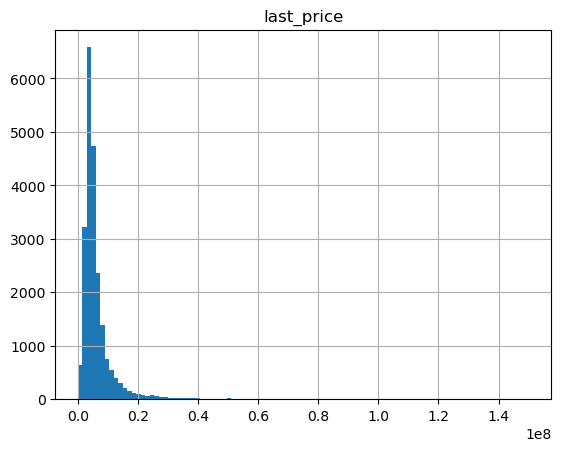

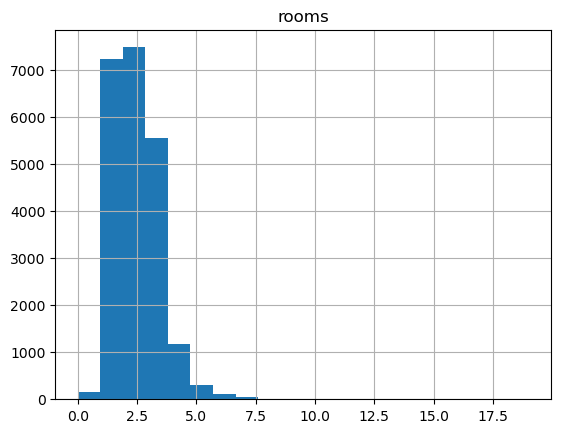

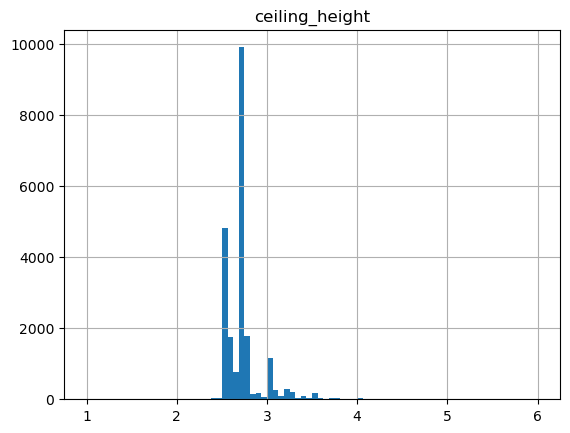

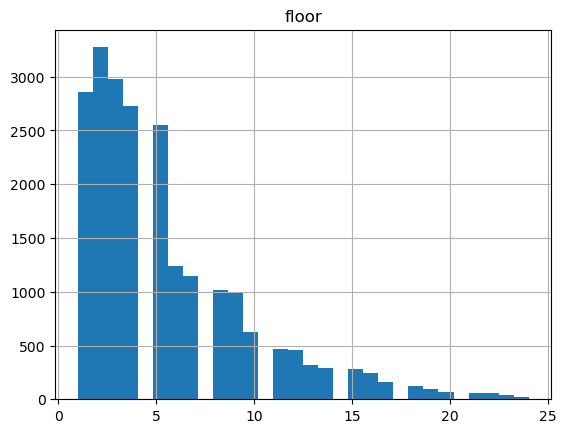

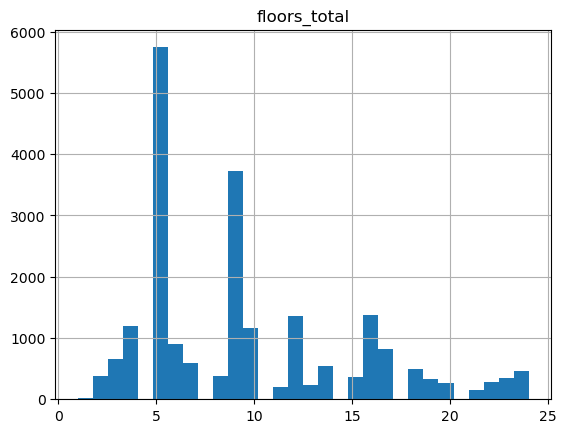

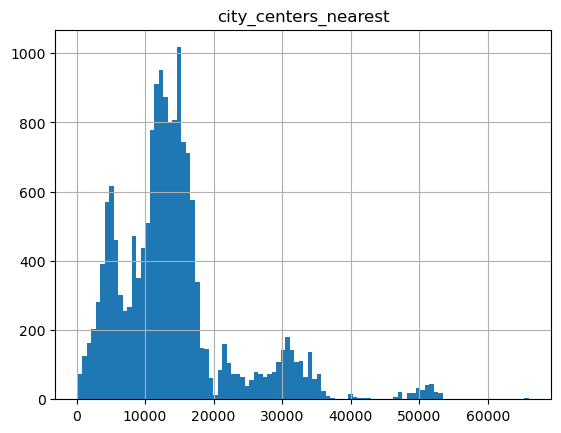

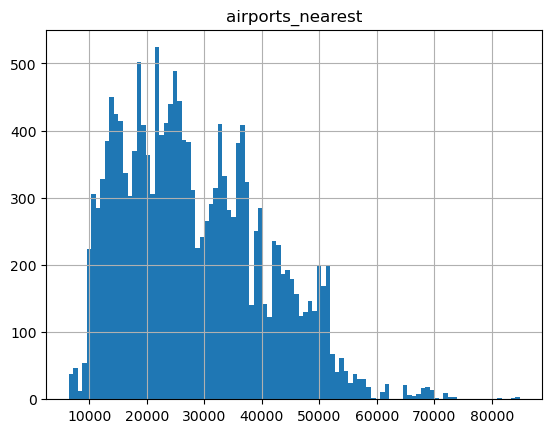

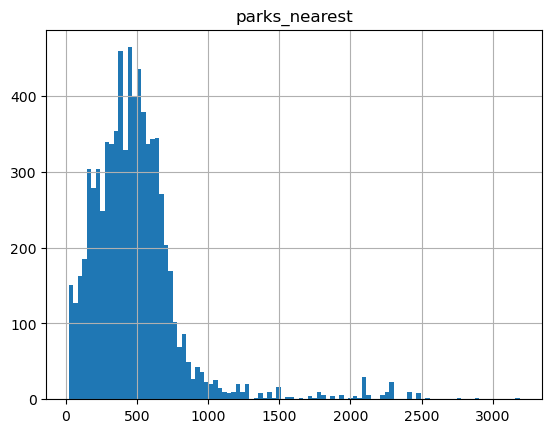

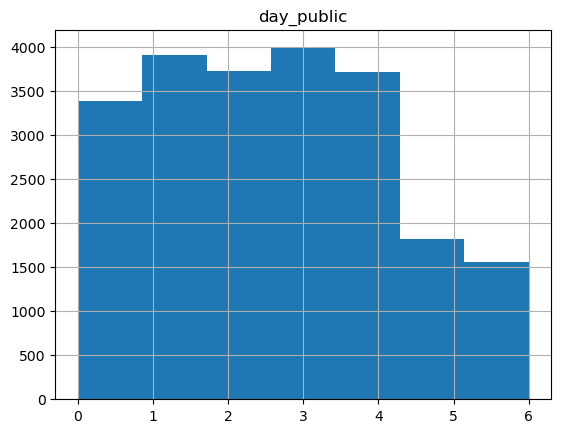

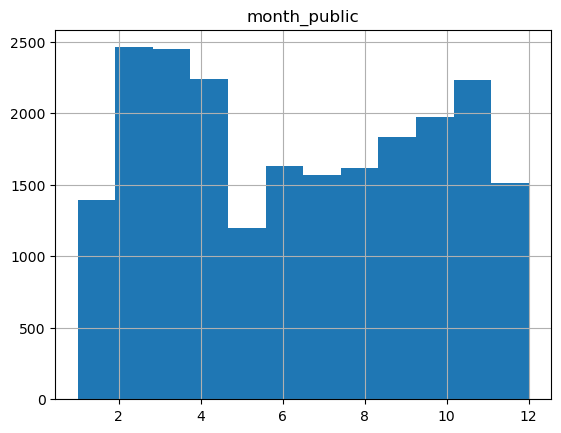

In [5]:
data['price_meter'] = round(data['last_price']/data['total_area']) # добавляем столбец с ценой за квадрат и округляем данные
data['day_public'] = data['first_day_exposition'].dt.weekday # добавляем столбец с днями недели
data['month_public'] = data['first_day_exposition'].dt.month
data['year_public'] = data['first_day_exposition'].dt.year

def categorize_floor(flo):
    if flo['floor'] == 1:
        return 'первый'
    elif flo['floor'] == flo['floors_total']:
            return 'последний'
    elif flo['floor'] != flo['floors_total']:
            return 'другой'
        
data['cat_floor'] = data.apply(categorize_floor, axis = 1) # выводим цикл, добавляем столбец с данными

data['city_distance'] = data['city_centers_nearest']/1000 # расстояние до центра в км

data.hist('total_area', bins = 200) # гистограмма общей площади
data.hist('living_area', bins = 200)
data.hist('kitchen_area', bins = 100)
data.hist('last_price', bins = 100, range = (0,15e+07))
data.hist('rooms', bins = 20)
data.hist('ceiling_height', bins = 80)
data.hist('floor', bins = 30)
#data.hist('cat_floor', bins = data['floors_total'].max())
data.hist('floors_total', bins = 30)
data.hist('city_centers_nearest', bins = 100)
data.hist('airports_nearest', bins = 100)
data.hist('parks_nearest', bins = 100)
data.hist('day_public', bins = 7)
data.hist('month_public', bins = 12)

print(data)



<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️ 

Хороший результат. Хочу добавить, что обычно размеры двухкомнатных квартир составляют от 50 до 100 квадратных метров, что и соответствует проведенному анализу.
    
Могу посоветовать на будущее хорошую статью по оформлению графиков:
    https://devpractice.ru/matplotlib-lesson-3-3-text-elements/    
        
    
    
</div>

4 Проведите исследовательский анализ данных

Среднее время продажи: 182.05032007555883
Медианное время продажи: 96.0


,all_ad,median_price_meter,mean_price_meter
locality_name,,,
Санкт-Петербург,14659,103797.0,114437.921277
Зеленогорск,23,100000.0,113248.739130
поселок Репино,4,86542.0,104238.500000
Пушкин,363,100000.0,103348.942149
Сестрорецк,181,99678.0,101741.425414
...,...,...,...
поселок Совхозный,2,12629.5,12629.500000
деревня Выскатка,2,12335.5,12335.500000
деревня Вахнова Кара,1,11688.0,11688.000000


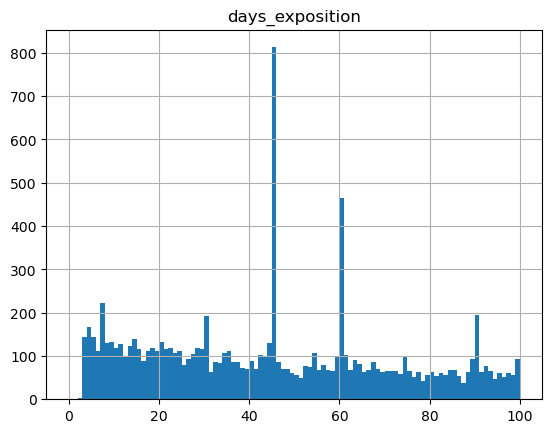

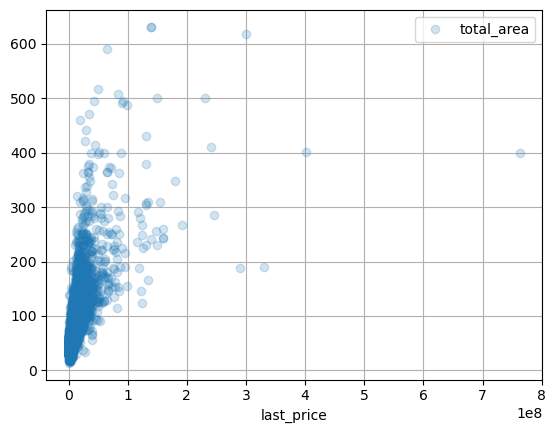

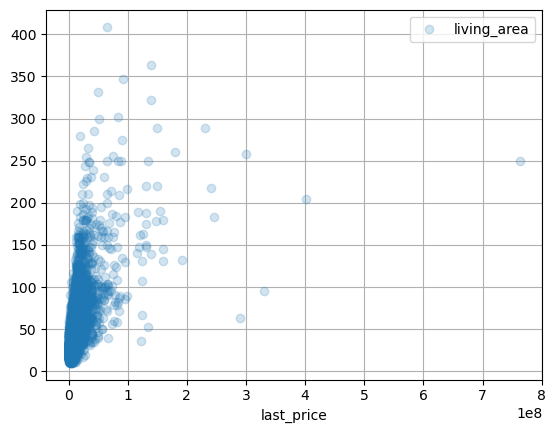

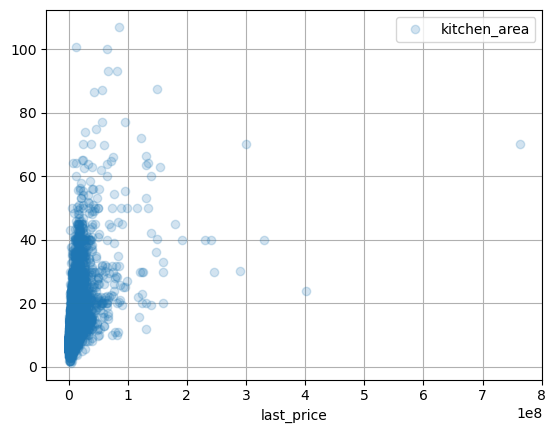

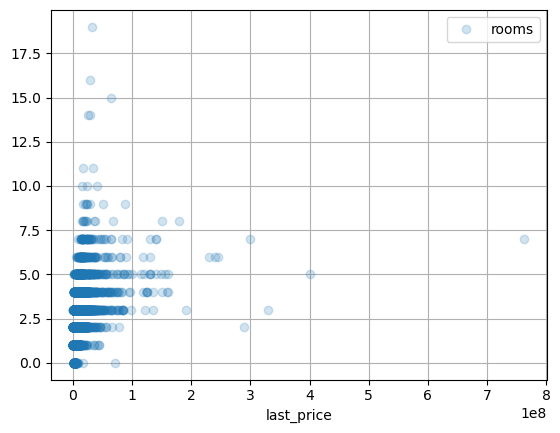

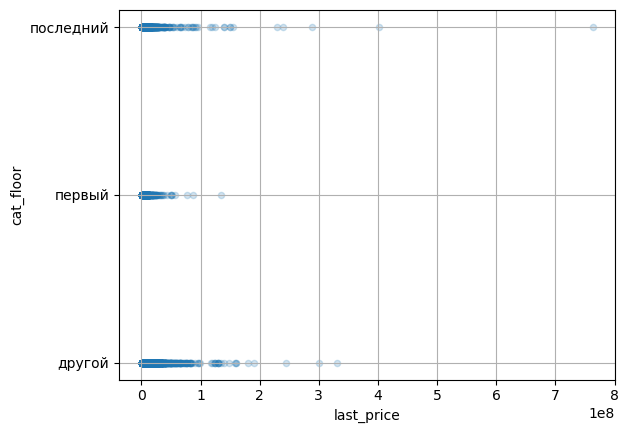

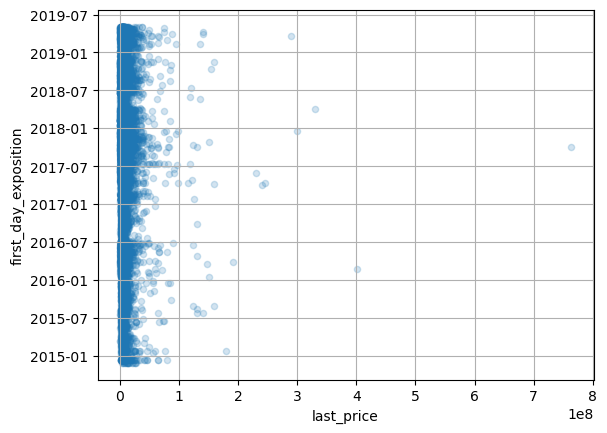

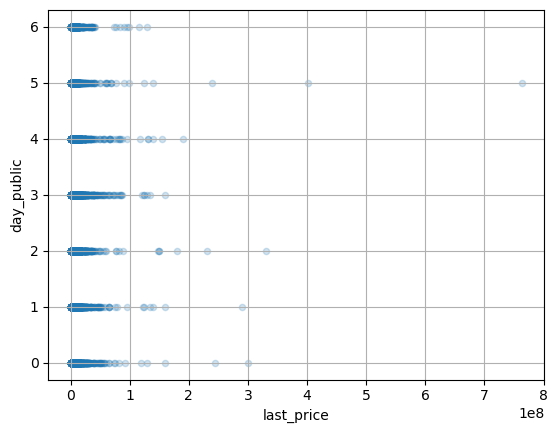

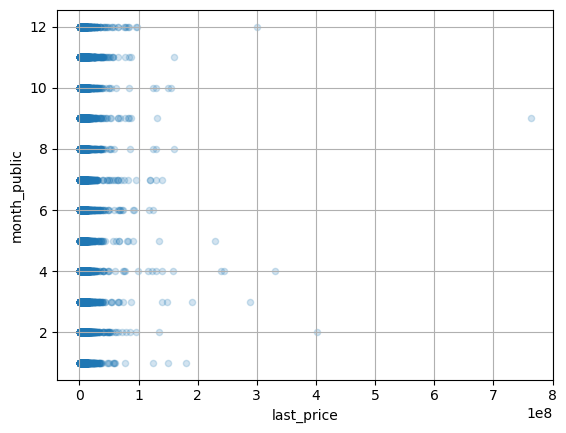

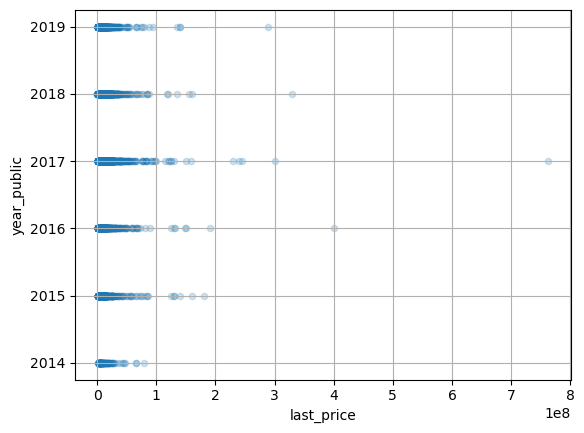

In [6]:


data.hist('days_exposition', bins = 100, range = (0,100))

print('Среднее время продажи:', data['days_exposition'].mean())
print('Медианное время продажи:', data['days_exposition'].median())

data.plot(x='last_price', y='total_area', style='o', alpha=0.2, grid=True) # зависимость цены от общей площади
data.plot(x='last_price', y='living_area', style='o', alpha=0.2, grid=True)
data.plot(x='last_price', y='kitchen_area', style='o', alpha=0.2, grid=True)
data.plot(x='last_price', y='rooms', style='o', alpha=0.2, grid=True)
data.plot(x='last_price', y='cat_floor', style='o', alpha=0.2, kind='scatter', grid=True)
data.plot(x='last_price', y='first_day_exposition', style='o', alpha=0.2, kind='scatter', grid=True)

data.plot(x='last_price', y='day_public', style='o', alpha=0.2, kind='scatter', grid=True)
data.plot(x='last_price', y='month_public', style='o', alpha=0.2, kind='scatter', grid=True)
data.plot(x='last_price', y='year_public', style='o', alpha=0.2, kind='scatter', grid=True)


data_top = data.pivot_table(index='locality_name', values='price_meter' , aggfunc=['count', 'median', 'mean'])
#Собираем новый датафрейм считаем 
data_top.columns = ['all_ad', 'median_price_meter', 'mean_price_meter']
data_top = data_top.sort_values('all_ad', ascending=False)
data_top = data_top.sort_values('mean_price_meter', ascending=False) # Выводим таблицу 
data_top


5 Общий вывод
Считаю что быстрыми продажами можно считать то что было продано до 3 месяцев (медианное значение), а долгими все что больше полугода (среднее значение). 
***5.1 Возможно это зависшие обьявления, может эти квартиры никто не хотел покупать из-за завышенной цены например?

  - общей площади - цена квартиры в среднем растет при увеличении метража до 130м, а потом снижается. Видимо более 130м это загородная недвижимость;
  - жилой площади - цена квартиры в среднем растет при увеличении метража жилой площади, а потом снижается. Видимо это загородная недвижимость;
  - площади кухни - цена квартиры в среднем растет при увеличении метража кухни до 20м, а потом снижается;
  - количество комнат - цена квартир ростет с ростом комнат до 5, а потом снижается. Видимо более 5 квартир это загородная недвижимость;
  - типа этажа, на котором расположена квартира (первый, последний, другой) - цены на квартиры на первом этаже стоят дешевле, последний и другой пратически не отличимы;
  - даты размещения (день недели, месяц, год) - из графика мы видим постепенный рост цен на недвижимость, также заметен обвал цен в 16 году;
  
***- день размещения - мы видим что по воскресеньям размещают самую бюджетную недвижимость, а по четвергам и пятницам самую дорогую.
месяц размещения - в январе (после НГ видимо мало покупают и поэтому рынок проседает), мае (из-за майских праздников спрос снижается) и  октябре цены на недвижимость ниже (видимо все пытаются закрыть квартирный вопрос за летний отпуск поэтому в ноябре спрос как и цена снижаются) 
 год размещения -  тут очень явно прослеживается скачек цен на недвижимость после 14 года (Интересно чтоже случилось???)
 
 
 *** - Добавил в таблицу 'data_top' средние значения. Самое высокое значение в Спб - 114446, а самое низкое в Выборге - 58094 (деревня Старополье - 11206  тут самое низкое). 
  
  

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Касательно быстрых и долгих продаж - на гистограмме заметны выбросы. Как думаешь, с чем они могут быть связаны? Скорректируй выводы о скорости продаж с учетом выбросов

</div>
<div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
   
    Эти выбросы указывают на автоматическое снятие объявления агрегатором - поэтому их не стоит учитывать как фактические продажи. https://yandex.ru/support/realty/owner/home/add-ads-housing.html
   

</div>




<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Касательно зависимости от даты - здесь важно построить графики зависимостей как указано в задании - то есть отдельно, от дня недели, от месяца и от года.


</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   В целом - хорошие результаты. Отмечу, что скорее всего, низкую цену на квартиры на первых этажах можно аргументировать плохими условиями - шум от улиц и  охлаждаемость помещения зимой. 

</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Не увидел задания шаг 4 пункт 4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Исправлено

</div>



       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
7                 5   7915000.0       71.60           2019-04-18      2   
...             ...         ...         ...                  ...    ...   
23688            19   9200000.0      101.00           2019-04-01      3   
23689            13   3550000.0       35.30           2018-02-28      1   
23690             3   5500000.0       52.00           2018-07-19      2   
23694             9   9700000.0      133.81           2017-03-21      3   
23697            13  11475000.0       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.700000 

/var/folders/tv/sn4tffws5ln3j2g0zrw19np00000gn/T/ipykernel_51762/2376490154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saint_p['city_distance']=saint_p['city_distance'].round(0) # Округляем данные


<Axes: xlabel='city_distance'>

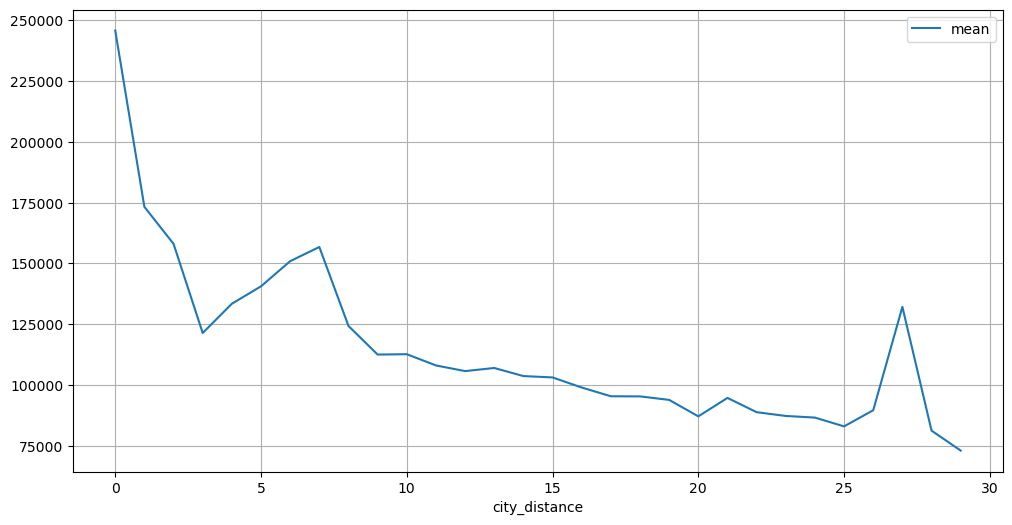

In [7]:
saint_p = data.query('locality_name == "Санкт-Петербург"') # Собираем таблицу с СПБ
saint_p['city_distance']=saint_p['city_distance'].round(0) # Округляем данные

print(saint_p)

no_refund=saint_p.groupby('city_distance').agg({'price_meter':['count','mean']}).reset_index() 
no_refund.columns = ['city_distance','count','mean']
#print(no_refund)



no_refund.plot(x = 'city_distance', y = 'mean', grid=True, figsize=(12, 6))

Самая дорогая недвижимость в центре Спб, дальше идет всплеск с 4 до 7 км. можно предположить что это новые кварталы в сером промышленном поясе! далее цены опять идут на спад, после видим ещё один всплеск в районе 26 км. думаю что это обьявления о продаже недвижимости в элитном поселке!



<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️

Верно. На графике после 7 км заметно, что цена меняется. 
    
Если интересно, то самый дорогой по стоимости жилья район в Санкт-Петербурге риелторы назвали "Золотой треугольник". Дома "Золотого треугольника" находятся в пределах Невского проспекта, набережной реки Фонтанки и Дворцовой набережной.
Для географической справки: https://zen.yandex.ru/media/id/5cb4ebcc0a51a300b5b1f60d/zolotoi-treugolnik-sanktpeterburga-chto-eto-i-gde-nahoditsia-5edf942db1204610073e88b2 

</div>


Общий вывод.

    В полученных данных было довольно много пропусков люди не заполняли графу о высоте потолков (видимо не знали), также было много пропусков в данных которые заполнялись автоматически (думаю по этому поводу требуется задать вопрос коллегам).
    Далее мы отчистили данные от аномалий и явных ошибок, удалили строки с квартирами где потолки выше 6 метров, а пропущенные значения в графе балконы заменили на ноль. Также удалили некоторые автоматизированные данные ограничив дальность до парков "Условной шириной дороги - 30м.".
    
    Определили быстрые продажами. Считаем что те квартиры которые были проданы до 3 месяцев (медианное значение) это быстрые продажи, а долгими все что больше полугода (среднее значение).
    
    Анализируя факторы больше всего влияющие на общую стоимость недвижимости делаем следующие выводы:
    
  - общая площадь - цена квартиры в среднем растет при увеличении метража до 130м, а потом снижается. Видимо более 130м это загородная недвижимость;
  - жилая площадь - цена квартиры в среднем растет при увеличении метража жилой площади, а потом снижается. Видимо это загородная недвижимость;
  - площадь кухни - цена квартиры в среднем растет при увеличении метража кухни до 20м, а потом снижается;
  - количество комнат - цена квартир ростет с ростом комнат до 5, а потом снижается. Видимо более 5 квартир это загородная недвижимость;
  - типа этажа, на котором расположена квартира (первый, последний, другой) - цены на квартиры на первом этаже стоят дешевле, последний и другой пратически не отличимы;
  - дата размещения (день недели, месяц, год) - из графика мы видим постепенный рост цен на недвижимость, также заметен обвал цен в 16 году (чекнул новости за 16 год и да действительно в 16 году был обвал цен);
  
    Далее мы анализировали зависимость средней цены квадратного метра от удаления от центра Санкт-Петербурга и определили топ-10 населённых пунктов с самой высокой стоимостью м2 жилья (такими городами стали Спб, Пушкин, Кудрово, Мурино).  А общая зависимость говорит нам о том что чем дальше от центра Спб на ходится недвижимость тем дешевле она стоит.
    
    Вообщем довольно интересная задача, былобы больше времени можно былобы еще исследовать и исследовать!
    


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Илья, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Илья, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [0]  изменены типы данных
- [0]  есть пояснение, в каких столбцах изменены типы и почему
- [0]  устранены неявные дубликаты в названиях населённых пунктов
- [0]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [х]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [х]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [х]  посчитано и добавлено в таблицу: месяц публикации объявления
- [х]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [o]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [0]  построены гистограммы для каждого параметра
- [0]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [0]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [х]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод